1) **CORNER DETECTION**

Looking for corners in images.

2) **EDGE DETECTION**

Expanding to find general edges of objects.

3) **GRID DETECTION**

Combining both concepts to find grids in images which is useful for applications.

4) **CONTOUR DETECTION**

Detect foreground vs background images.
Also allows for detection of external vs internal contours(e.g. grabbing the eyes and smile from a cartoon smile face.)

5) **FEATURE MATCHING**

6) **WATERSHED ALGORITHM**

ADVANCED ALGORITHM that allows us to segment images into foreground and background. Also allows us to manually set seeds to choose segments of an image.

7)**FACIAL AND EYE DETECTION**

We will use Haar Cascades to detect faces in images. This isn't actually face recognition that will be done further by learning deep learning.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

**TEMPLATE MATCHING**

The image should be either the same given image or its subset.

In [2]:
full = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/sammy.jpg")
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

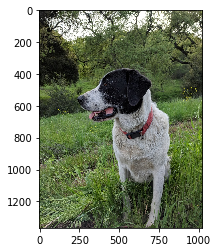

In [3]:
plt.imshow(full);

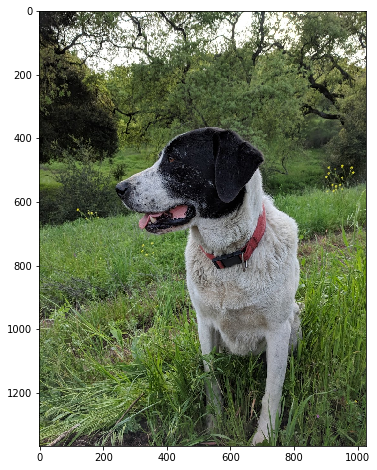

In [4]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.imshow(full)

In [5]:
face = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/sammy_face.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

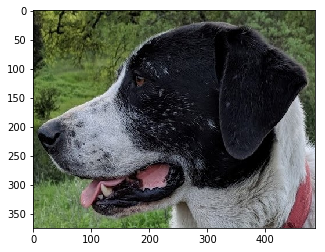

In [6]:
plt.imshow(face)

Here the size of sammy's face is exactly the same as in the actual above main image. So this is one of the restriction in template matching that is the size should be the exact same. 

In [7]:
sum([1,2,3])

6

In [8]:
mystring = 'sum'

**We will see the functioning of eval.**

In [9]:
eval(mystring)

<function sum(iterable, start=0, /)>

In [10]:
myfunc = eval(mystring)

In [11]:
myfunc([1,2,3])

6

In [12]:
# All the six methods for comparison in a list.
# Note how we are using strings, Later on we will use the eval() function to convert to function.
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

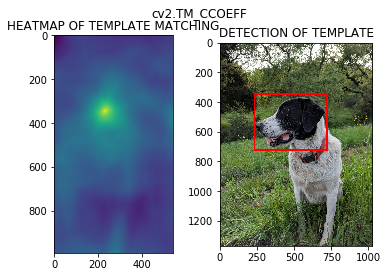

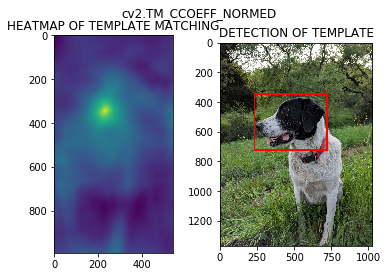

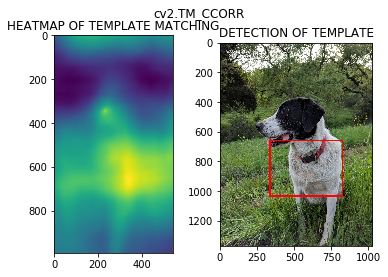

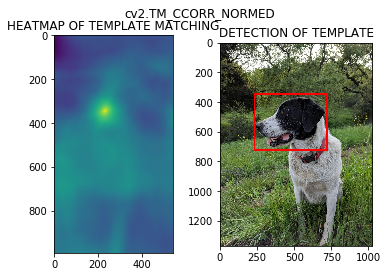

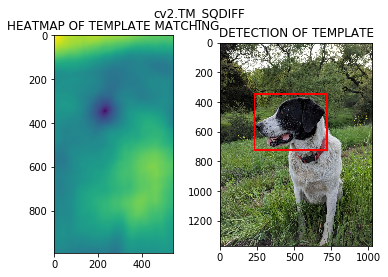

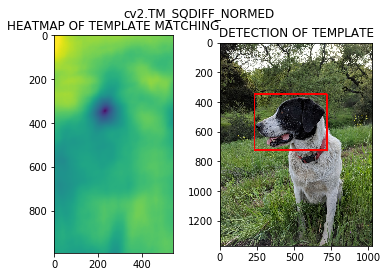

In [13]:
for m in methods:
    
    # CREATE A COPY
    full_copy = full.copy()
    
    
    method = eval(m)
    
    
    # TEMPLATE MATCHING
    res = cv2.matchTemplate(full_copy, face, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # This is to check where the left most point of the rectangle would go.
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    # This is to define the dimensions of the rectangle.   
    height, width, channels = face.shape
    
    bottom_right = (top_left[0]+width, top_left[1] + height)
    
    # Drawing the rectangle.
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    # PLOT AND SHOW THE IMAGES.
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    
    # TITLE EVERYTHING WITH THE METHOD USED
    plt.suptitle(m)
    
    # THIS IS USED TO MAKE SURE THAT ALL THE ABOVE PLT.IMSHOW ARE SHOWN SEPARATELY AND THEY DO NOT OVERREAD.
    plt.show()
    
    # This is to leave space between the two images.
    print('\n')
    print('\n')

In [14]:
# plt.subplot(121) says that give me a plot that is 1 row by two column. So,
# we are going to have two images right next to each other(right and left) and 
# the last 1 tells to grab the first one.

In [15]:
# Implementation of this part.

my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full_copy, face, my_method)

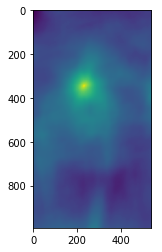

In [16]:
plt.imshow(res);

Here we see that this is actually a kind of heat map.

**This green point in the middle is the position where the dog face is in the actual image.** So from here we are going to get the minimum and maximum values from this heat map and then draw a recatngle around.

**CORNER DETECTION**

1) HARRIS CORNER DETECTION

2) SHI-TOMSAI CORNER DETECTION

**WHAT IS A CORNER?**

A corner is a point whose local neighbourhood stands in two dominant and different edge directions.

**HARRIS CORNER DETECTION**

In [20]:
flat_chess = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

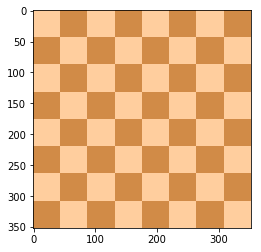

In [23]:
plt.imshow(flat_chess);

In [33]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

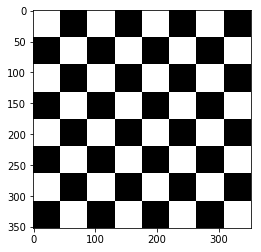

In [34]:
plt.imshow(gray_flat_chess, cmap = 'gray');

In [29]:
real_chess = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

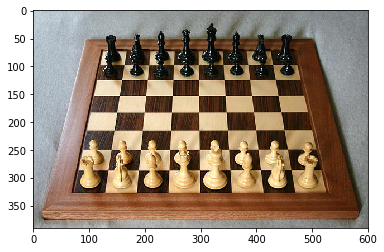

In [31]:
plt.imshow(real_chess);

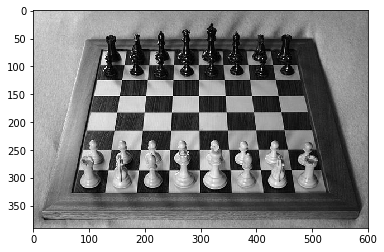

In [32]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess, cmap = 'gray')

In [37]:
# To convert all the values to float.
gray = np.float32(gray_flat_chess)

In [38]:
gray

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]], dtype=float32)

In [39]:
dst = cv2.cornerHarris(src = gray, blockSize = 2, ksize = 3, k = 0.04)

In [40]:
dst = cv2.dilate(dst, None)

In [41]:
flat_chess[dst > 0.01*dst.max()] = [255,0,0]

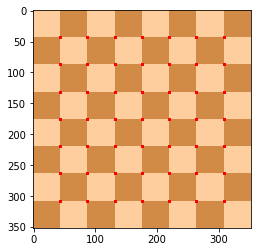

In [42]:
plt.imshow(flat_chess)

This cant detect the corners at the border of the image.

In [43]:
gray2 = np.float32(gray_real_chess)

In [44]:
gray2

array([[210., 204., 202., ..., 119., 119., 124.],
       [203., 200., 199., ..., 118., 116., 117.],
       [213., 214., 212., ..., 130., 128., 128.],
       ...,
       [120., 131., 144., ..., 115., 119., 118.],
       [124., 143., 153., ..., 111., 112., 107.],
       [135., 155., 156., ..., 113., 113., 107.]], dtype=float32)

In [45]:
dst2 = cv2.cornerHarris(src = gray2, blockSize = 2, ksize = 3, k = 0.04)

In [49]:
dst2 = cv2.dilate(dst2,None)

In [51]:
real_chess[dst2 > 0.01*dst2.max()] = [255,0,0]

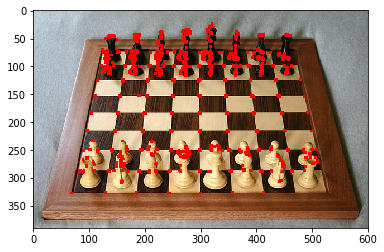

In [52]:
plt.imshow(real_chess)

**SHI TOMSAI DETECTION**

In [86]:
real_chess = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

flat_chess = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

In [87]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 30, 0.01, 10)
# The number '30' mentioned is the number of corners you want to identify.

In [88]:
# Converting float to int.
corners = np.int0(corners)

In [89]:
corners

array([[[308, 308]],

       [[264, 308]],

       [[220, 308]],

       [[176, 308]],

       [[132, 308]],

       [[ 88, 308]],

       [[ 44, 308]],

       [[308, 264]],

       [[264, 264]],

       [[220, 264]],

       [[176, 264]],

       [[132, 264]],

       [[ 88, 264]],

       [[ 44, 264]],

       [[308, 220]],

       [[264, 220]],

       [[220, 220]],

       [[176, 220]],

       [[132, 220]],

       [[ 88, 220]],

       [[ 44, 220]],

       [[308, 176]],

       [[264, 176]],

       [[220, 176]],

       [[176, 176]],

       [[132, 176]],

       [[ 88, 176]],

       [[ 44, 176]],

       [[308, 132]],

       [[264, 132]]])

In [90]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3 , (255,0,0),-1)

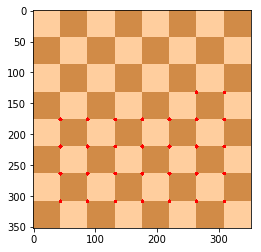

In [91]:
plt.imshow(flat_chess);

In [99]:
corners2 = cv2.goodFeaturesToTrack(gray_real_chess,100,0.01,10)

In [100]:
corners2 = np.int0(corners2)

In [101]:
corners2

array([[[178,  91]],

       [[132,  90]],

       [[448,  86]],

       [[177,  75]],

       [[183, 105]],

       [[403,  87]],

       [[274, 109]],

       [[248, 183]],

       [[278, 258]],

       [[223,  92]],

       [[154, 154]],

       [[261,  80]],

       [[207, 288]],

       [[133,  74]],

       [[197, 216]],

       [[299, 249]],

       [[317,  77]],

       [[260, 254]],

       [[365,  85]],

       [[299, 286]],

       [[243, 286]],

       [[249, 154]],

       [[299, 214]],

       [[190, 286]],

       [[145, 215]],

       [[200, 184]],

       [[227, 110]],

       [[270,  99]],

       [[362, 112]],

       [[149, 184]],

       [[274,  86]],

       [[407, 113]],

       [[194, 249]],

       [[132, 100]],

       [[246, 249]],

       [[317, 248]],

       [[298, 182]],

       [[246, 216]],

       [[317, 112]],

       [[219,  81]],

       [[164,  98]],

       [[203, 153]],

       [[298, 152]],

       [[363,  47]],

       [[344, 152]],

       [[2

In [102]:
for i in corners2:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3 , (255,0,0),-1)

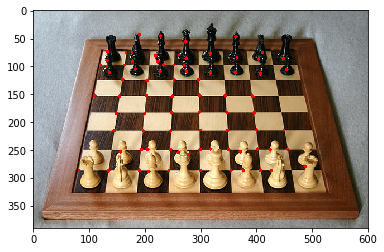

In [98]:
plt.imshow(real_chess);

**EDGE DETECTION**

**Canny Edge detector method**

Steps it follows are------->

1) Apply Gaussian filter to smooth the image in order to remove the noise.(this has to be done by ourselves too before the process does by itself.

2)Find the intensity gradients of the image.

3)Apply non-maximum suppression to get rid of spurious response to edge detection.

4) Apply double threshold to determine potential edges.

5) Track edge by hysteresis: Finalize the detection of edges suppressing all the other edges that are weak and not connected to strong edges.



**THE CANNY ALGORITHM ALSO REQUIRES A USER TO DECIDE LOW AND HIGH THRESHOLD VALUES**

In [105]:
img = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/sammy_face.jpg")           

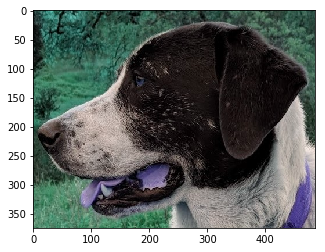

In [106]:
plt.imshow(img)

In [107]:
edges = cv2.Canny(image = img, threshold1 = 127,threshold2 = 127)

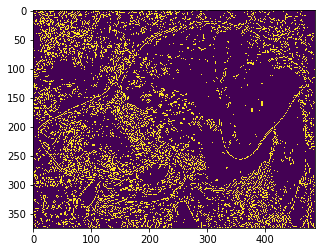

In [109]:
plt.imshow(edges);

Here we see that we have got egdes but there is too many noise.
So, we are required to reduce the noise which can be done by blurring or we can change the threshold values in the Canny function.

In [110]:
edges = cv2.Canny(image = img, threshold1 = 0,threshold2 = 255)

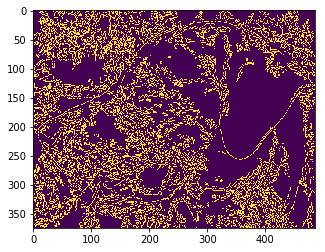

In [111]:
plt.imshow(edges)

In [112]:
med_val = np.median(img)

In [113]:
med_val

64.0

In [116]:
# LOWER THRESHOLD TO EITHER 0 OR 70% OF THE MEDIAN VALUE WHICHEVER IS GREATER. 
lower = int(max(0,0.7*med_val))
# UPPER THRESHOLD TO EITHER 130% OF THE MEDIAN OR THE MAX 255, WHICHEVER IS SMALLER.
upper = int(min(255,1.3*med_val))

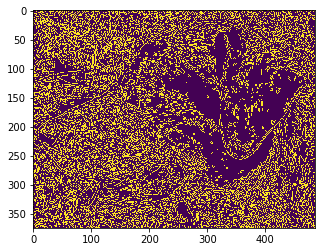

In [117]:
edges = cv2.Canny(image = img, threshold1 = lower,threshold2 = upper)
plt.imshow(edges)

This shows the more bad image.So we can change the values of higher and lower to get less noise.

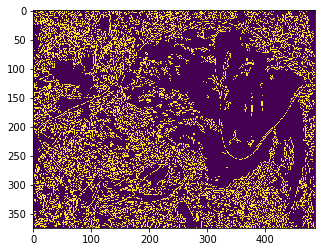

In [118]:
edges = cv2.Canny(image = img, threshold1 = lower,threshold2 = upper+100)
plt.imshow(edges)

In [124]:
# SO WE WILL FIRSTLY BLURR THE IMAGE.
blurred_image = cv2.blur(img, ksize = (5,5))

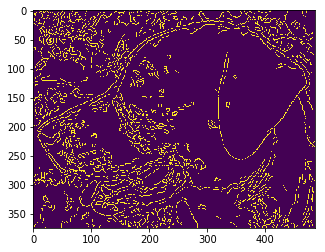

In [125]:
edges = cv2.Canny(image = blurred_image, threshold1 = lower,threshold2 = upper)
plt.imshow(edges)

NOW WE SEE THAT WE GET BETTER RESULTS.
WE CAN INCREASE THE SIZE OF KERNEL TO GET MORE BETTER RESULTS UNTIL WE GET THE REQUIRED.

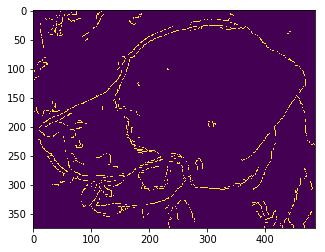

In [127]:
blurred_image = cv2.blur(img, ksize = (9,9))
edges = cv2.Canny(image = blurred_image, threshold1 = lower,threshold2 = upper)
plt.imshow(edges);

**GRID DETECTION**

THis is oftenly used for camera caliberation.

In [128]:
flat_chessboard = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/flat_chessboard.png")

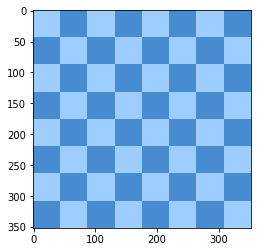

In [130]:
plt.imshow(flat_chessboard);

In [131]:
found, corners = cv2.findChessboardCorners(flat_chessboard, (7,7))

In [132]:
found

True

In [135]:
corners

array([[[ 43.500004,  43.500004]],

       [[ 87.5     ,  43.5     ]],

       [[131.5     ,  43.5     ]],

       [[175.5     ,  43.5     ]],

       [[219.5     ,  43.5     ]],

       [[263.5     ,  43.5     ]],

       [[307.5     ,  43.5     ]],

       [[ 43.499996,  87.50001 ]],

       [[ 87.5     ,  87.5     ]],

       [[131.5     ,  87.5     ]],

       [[175.5     ,  87.5     ]],

       [[219.5     ,  87.5     ]],

       [[263.5     ,  87.5     ]],

       [[307.5     ,  87.49999 ]],

       [[ 43.500004, 131.5     ]],

       [[ 87.5     , 131.5     ]],

       [[131.5     , 131.5     ]],

       [[175.5     , 131.5     ]],

       [[219.5     , 131.5     ]],

       [[263.5     , 131.5     ]],

       [[307.5     , 131.5     ]],

       [[ 43.499996, 175.5     ]],

       [[ 87.5     , 175.5     ]],

       [[131.5     , 175.5     ]],

       [[175.5     , 175.5     ]],

       [[219.5     , 175.5     ]],

       [[263.5     , 175.5     ]],

       [[307.5     , 175.5  

In [147]:
# To draw on real image.
cv2.drawChessboardCorners(flat_chessboard,(7,7), corners, found)

array([[[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       ...,

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]]

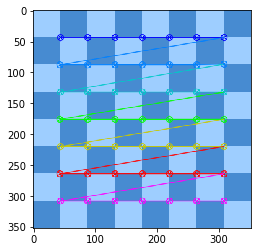

In [138]:
plt.imshow(flat_chessboard);

In [139]:
dots = cv2.imread("/home/soniya/Documents/work/Computer-Vision-with-Python/DATA/dot_grid.png")

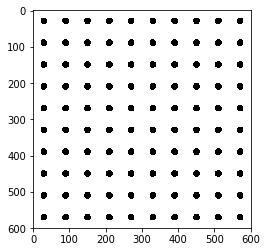

In [140]:
plt.imshow(dots)

In [141]:
found,corners = cv2.findCirclesGrid(dots,(10,10),cv2.CALIB_CB_SYMMETRIC_GRID)

In [142]:
found

True

In [143]:
corners

array([[[ 29.5,  29.5]],

       [[ 89.5,  29.5]],

       [[149.5,  29.5]],

       [[209.5,  29.5]],

       [[269.5,  29.5]],

       [[329.5,  29.5]],

       [[389.5,  29.5]],

       [[449.5,  29.5]],

       [[509.5,  29.5]],

       [[569.5,  29.5]],

       [[ 29.5,  89.5]],

       [[ 89.5,  89.5]],

       [[149.5,  89.5]],

       [[209.5,  89.5]],

       [[269.5,  89.5]],

       [[329.5,  89.5]],

       [[389.5,  89.5]],

       [[449.5,  89.5]],

       [[509.5,  89.5]],

       [[569.5,  89.5]],

       [[ 29.5, 149.5]],

       [[ 89.5, 149.5]],

       [[149.5, 149.5]],

       [[209.5, 149.5]],

       [[269.5, 149.5]],

       [[329.5, 149.5]],

       [[389.5, 149.5]],

       [[449.5, 149.5]],

       [[509.5, 149.5]],

       [[569.5, 149.5]],

       [[ 29.5, 209.5]],

       [[ 89.5, 209.5]],

       [[149.5, 209.5]],

       [[209.5, 209.5]],

       [[269.5, 209.5]],

       [[329.5, 209.5]],

       [[389.5, 209.5]],

       [[449.5, 209.5]],

       [[509

In [145]:
cv2.drawChessboardCorners(dots,(10,10), corners,found)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

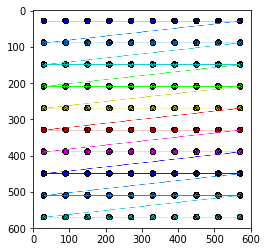

In [146]:
plt.imshow(dots);

In [16]:
img2 = cv2.imread("/home/soniya/Documents/work/sample.jpg")    
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

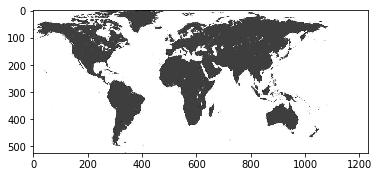

In [17]:
plt.imshow(img2,cmap = 'gray')

In [19]:
blur = cv2.blur(img2, (3, 3))
ret, threshh = cv2.threshold(blur, 127,255,cv2.THRESH_BINARY)

In [21]:
contours, hierarchy = cv2.findContours(threshh, cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)